In [8]:
#Download the cleaned data by removing outliers

!gdown 1lG7g7ppiONvlarjVWacLTv7Bdi82WzA0

Downloading...
From: https://drive.google.com/uc?id=1lG7g7ppiONvlarjVWacLTv7Bdi82WzA0
To: /content/loan_outlier_cleaned_file.csv
100% 22.9M/22.9M [00:00<00:00, 75.2MB/s]


In [9]:
# libraries to analyze data
import numpy as np
import pandas as pd

# libraries to visualize data
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(20, 6)})
# libraries to perform stats
import scipy.stats as stats

In [10]:
# Read the data from a csv file
loan_clnd_df = pd.read_csv("/content/loan_outlier_cleaned_file.csv")

In [11]:
loan_clnd_df.head()

,Unnamed: 0,loan_amount_scaled,rate_of_interest_scaled,Upfront_charges_scaled,property_value_scaled,income_scaled,LTV_scaled,loan_limit,Gender,loan_type,loan_purpose,business_or_commercial,occupancy_type,credit_type,Credit_Score,co-applicant_credit_type,age,Region,Status,category
0,0,-0.750000,0.416,-0.582675,-0.828571,-0.846154,0.948072,cf,Sex Not Available,type1,p1,nob/c,pr,EXP,758,CIB,25-34,south,1,Very Good
1,1,-0.375000,-0.092,-0.331270,-0.571429,-0.153846,0.970587,cf,Male,type2,p1,b/c,pr,EQUI,552,EXP,55-64,North,1,Poor
2,2,0.458333,0.912,-0.411344,0.285714,0.807692,0.182221,cf,Male,type1,p1,nob/c,pr,EXP,834,CIB,35-44,south,0,Excellent
3,3,0.666667,0.416,-0.152187,0.714286,1.320513,-0.253438,cf,Male,type1,p4,nob/c,pr,EXP,587,CIB,45-54,North,0,Fair
4,4,1.666667,0.016,-0.582675,1.000000,1.012821,0.667986,cf,Joint,type1,p1,nob/c,pr,CRIF,602,EXP,25-34,North,0,Fair


In [12]:
#Unnamed: 0 is a field which is just an index and drop the column

loan_clnd_df = loan_clnd_df.drop('Unnamed: 0', axis=1)

In [13]:
loan_clnd_df.head()

,loan_amount_scaled,rate_of_interest_scaled,Upfront_charges_scaled,property_value_scaled,income_scaled,LTV_scaled,loan_limit,Gender,loan_type,loan_purpose,business_or_commercial,occupancy_type,credit_type,Credit_Score,co-applicant_credit_type,age,Region,Status,category
0,-0.750000,0.416,-0.582675,-0.828571,-0.846154,0.948072,cf,Sex Not Available,type1,p1,nob/c,pr,EXP,758,CIB,25-34,south,1,Very Good
1,-0.375000,-0.092,-0.331270,-0.571429,-0.153846,0.970587,cf,Male,type2,p1,b/c,pr,EQUI,552,EXP,55-64,North,1,Poor
2,0.458333,0.912,-0.411344,0.285714,0.807692,0.182221,cf,Male,type1,p1,nob/c,pr,EXP,834,CIB,35-44,south,0,Excellent
3,0.666667,0.416,-0.152187,0.714286,1.320513,-0.253438,cf,Male,type1,p4,nob/c,pr,EXP,587,CIB,45-54,North,0,Fair
4,1.666667,0.016,-0.582675,1.000000,1.012821,0.667986,cf,Joint,type1,p1,nob/c,pr,CRIF,602,EXP,25-34,North,0,Fair


In [14]:
loan_clnd_df.shape

(128459, 19)

In [15]:
loan_clnd_df.columns

Index(['loan_amount_scaled', 'rate_of_interest_scaled',
       'Upfront_charges_scaled', 'property_value_scaled', 'income_scaled',
       'LTV_scaled', 'loan_limit', 'Gender', 'loan_type', 'loan_purpose',
       'business_or_commercial', 'occupancy_type', 'credit_type',
       'Credit_Score', 'co-applicant_credit_type', 'age', 'Region', 'Status',
       'category'],
      dtype='object')

## **Compare the means of a numerical variable across Males and Females**

## **Loan Amount v/s Gender**

**Null Hypothesis (H0):** The mean loan amount is same across Males and Females.

**Alternative Hypothesis (H1):** The mean loan amount are not same across Males and Females.

**We perform the tests at 5% significance level**

In [16]:
loan_clnd_df.Gender.unique()

array(['Sex Not Available', 'Male', 'Joint', 'Female'], dtype=object)

In [33]:
# Separate the loan amounts by Gender Categories

male_loan_amounts = loan_clnd_df[loan_clnd_df['Gender'] == 'Male']['loan_amount_scaled']
female_loan_amounts = loan_clnd_df[loan_clnd_df['Gender'] == 'Female']['loan_amount_scaled']


In [34]:
print(male_loan_amounts.shape)
print(female_loan_amounts.shape)


(37080,)
(24537,)


In [35]:
# Determine the minimum sample size
min_sample_size = min(male_loan_amounts.shape, female_loan_amounts.shape)
min_sample_size

(24537,)

In [37]:
# Randomly sample rows from each group
male_loan_amounts = loan_clnd_df[loan_clnd_df['Gender'] == 'Male'].sample(n=min_sample_size[0], random_state=1)
female_loan_amounts = loan_clnd_df[loan_clnd_df['Gender'] == 'Female'].sample(n=min_sample_size[0], random_state=1)

In [38]:
# Levene's test for homogeneity of variances
stat, p = stats.levene(male_loan_amounts['loan_amount_scaled'],female_loan_amounts['loan_amount_scaled'])
print(f'Levene’s test statistic: {stat}, P-value: {p}')
if p < 0.05:
  print("Reject the Null hypothesis.Variances are not equal")
else:
  print("Fail to Reject the Null hypothesis.Variances are  equal")

Levene’s test statistic: 60.84285524517408, P-value: 6.303212325854791e-15
Reject the Null hypothesis.Variances are not equal


In [39]:
# Shapiro-Wilk test for normality
for gender in [male_loan_amounts,female_loan_amounts]:
    stat, p = stats.shapiro(gender['loan_amount_scaled'])
    print(f'W-statistic: {stat}, P-value: {p}')
    if p < 0.05:
      print("Reject the Null hypothesis.No Normal Distribution")
    else:
      print("Fail to Reject the Null hypothesis.Normal Distribution")

W-statistic: 0.9606715650040482, P-value: 1.9480679079764084e-61
Reject the Null hypothesis.No Normal Distribution
W-statistic: 0.9535555507184893, P-value: 9.405348015110177e-65
Reject the Null hypothesis.No Normal Distribution


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 24537.
  res = hypotest_fun_out(*samples, **kwds)


In [40]:
f_stat, p_value = stats.ttest_ind(male_loan_amounts['loan_amount_scaled'],female_loan_amounts['loan_amount_scaled'],equal_var=False)
print(f"Welch's F-statistic: {f_stat}, P-value: {p_value}")

Welch's F-statistic: 20.578873961655816, P-value: 1.0593966501504058e-93


In [41]:
# Perform kruskal -
f_stat, p_value = stats.kruskal(male_loan_amounts['loan_amount_scaled'],female_loan_amounts['loan_amount_scaled'])
print(f"F-statistic: {f_stat}, P-value: {p_value}")

F-statistic: 413.3989773128044, P-value: 6.672118635311465e-92


In [42]:
if(p_value < 0.05):
  print("Reject H0 (Null Hypothesis),i.e. The mean loan amount is same across Males and Females.")
else:
  print("Fail to Reject H0 (Null Hypothesis),i.e. The mean loan amount is not same across Males and Females.")

Reject H0 (Null Hypothesis),i.e. The mean loan amount is same across Males and Females.


## **Is there a significant difference between the different age groups when it comes to loan status ?**

**Null Hypothesis (H0):** There is no significant difference between the different age groups when it comes to loan status.

**Alternative Hypothesis (H1):** There is a significant difference between the different age groups when it comes to loan status.

**We perform the tests at 5% significance level**

In [43]:
#contingency table
cont_table  = pd.crosstab(loan_clnd_df['age'], loan_clnd_df['Status'])
cont_table

Status,0,1
age,,
25-34,13822,3979
35-44,22147,6586
45-54,21670,7566
55-64,19901,7534
65-74,12823,5076
<25,898,374
>74,4150,1933


In [44]:
#Computing P value
_,p,_,expected=stats.chi2_contingency(cont_table, correction = True)
print("The obtained P-Value is: "+str(p))
print("\n")
print("The expected frequencies are: ")
expected_df=pd.DataFrame(expected)
expected_df.columns=cont_table.columns
expected_df.index=cont_table.index
expected_df

The obtained P-Value is: 7.662341723499145e-96


The expected frequencies are: 


Status,0,1
age,,
25-34,13221.426377,4579.573623
35-44,21341.005792,7391.994208
45-54,21714.601515,7521.398485
55-64,20376.935715,7058.064285
65-74,13294.214411,4604.785589
<25,944.758966,327.241034
>74,4518.057224,1564.942776


In [45]:
if p < 0.05:
  print("Reject the Null hypothesis.There is significant difference between the different age groups when it comes to loan status.")
else:
  print("Fail to Reject the Null hypothesis.There is no significant difference between the different age groups when it comes to loan status.")

Reject the Null hypothesis.There is significant difference between the different age groups when it comes to loan status.


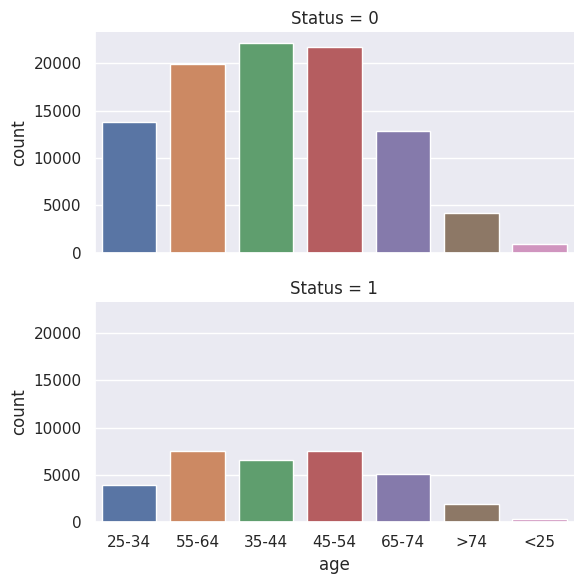

In [46]:
sns.catplot(x='age', row = 'Status',
            kind='count', data=loan_clnd_df, hue='age',
            height = 3, aspect = 2)
plt.show()

**Observation:** The graph shows that loan status (Normal or Default) is not the same across all age groups. There are some age groups where loan normal is more common, and others where loan default is more common. This means that age might be an important factor in whether a loan is normal or default, and we should look into it more to find out why. In order to determine if there is a statistically significant difference in loan status between these groups, we should conduct a **Chi2 test** that accounts for the differences in sample size

In [47]:
def perform_Chi_square_test(col1, col2):
  data_table = pd.crosstab(loan_clnd_df[col1], loan_clnd_df[col2])
  # print("Observed values:")
  # print(data_table)
  test_statistic, p_value, dof, expected_values = stats.chi2_contingency(data_table)
  print("Test statistic:", test_statistic)
  print("p-value:", p_value)
  if(p_value < 0.05):
    print(f"Reject H0 (Null Hypothesis), i.e., {col1} and {col2} are associated.")
  else:
    print(f"Fail to Reject H0 (Null Hypothesis),i.e. {col1} and {col2} are not asscoiated.")

In [48]:
perform_Chi_square_test('age', 'Status')

Test statistic: 458.3931806837213
p-value: 7.662341723499145e-96
Reject H0 (Null Hypothesis), i.e., age and Status are associated.


**Both Statistically and visually we proved that there is significant difference between the different age groups when it comes to loan status.**

## **Is there a significant difference in loan status based on gender ?**

**Null Hypothesis (H0):** There is no significant difference between the different genders when it comes to loan status.

**Alternative Hypothesis (H1):** There is a significant difference between the different gendeers when it comes to loan status.

**We perform the tests at 5% significance level**

In [49]:
loan_clnd_df.Gender.value_counts()
#To answer this question, I am only going to use the "Male" and "Female" genders , as joint being them combined and "Sex Not Available" non-informative

,count
Gender,
Male,37080
Joint,34234
Sex Not Available,32608
Female,24537


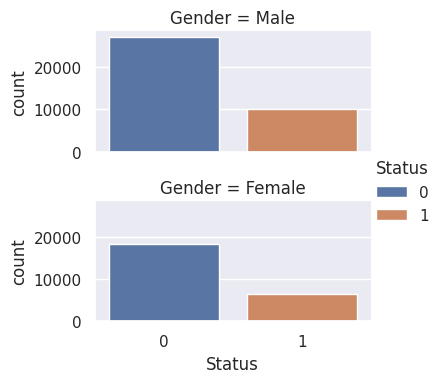

In [50]:
loan_per_gender=loan_clnd_df[(loan_clnd_df.Gender=="Female") | (loan_clnd_df.Gender=="Male")]
sns.catplot(x='Status', row = 'Gender',
            kind='count', data=loan_per_gender, hue='Status',
            height = 2, aspect = 2)
plt.show()

In [51]:
cont_table2=pd.crosstab(loan_per_gender.Gender,loan_per_gender.Status)
cont_table2

Status,0,1
Gender,,
Female,18149,6388
Male,27051,10029


In [52]:
_,p2,_,expected2=stats.chi2_contingency(cont_table2, correction = True)
expected2=pd.DataFrame(expected2,index=cont_table2.index)
expected2.columns=cont_table2.columns
print("The P_value obtained from this test is: "+str(p2))
expected2

The P_value obtained from this test is: 0.005530001101402764


Status,0,1
Gender,,
Female,17999.454696,6537.545304
Male,27200.545304,9879.454696


In [53]:
if p < 0.05:
  print("Reject the Null hypothesis.There is significant difference between the different genders when it comes to loan status.")
else:
  print("Fail to Reject the Null hypothesis.There is no significant difference between the different genders when it comes to loan status.")

Reject the Null hypothesis.There is significant difference between the different genders when it comes to loan status.


**Conclusion:** Since the P-value is less than the signficance level (alpha Value) that we have chosen, then we reject the Null hypothesis as there is enough proof that there is an association between the GENDER and the loan STATUS.

## **Property Value v/s Loan amount**


**Null Hypothesis (H0):** There is no difference between property value and loan amount.

**Alternative Hypothesis (H1):** There is a difference between property value and loan amount.

In [54]:
# Perform Pearson correlation test
corr, p_value = stats.pearsonr(loan_clnd_df['property_value_scaled'], loan_clnd_df['loan_amount_scaled'])
print(f"Pearson Correlation: {corr}, P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant linear relationship between property value and loan amount.")
else:
    print("Fail to reject the null hypothesis. There is no significant linear relationship between property value and loan amount.")

Pearson Correlation: 0.858325697957168, P-value: 0.0
Reject the null hypothesis. There is a significant linear relationship between property value and loan amount.


In [56]:
# Shapiro-Wilk test for normality
stat, p = stats.shapiro(loan_clnd_df['property_value_scaled'])
print(f'Property Value: W-statistic: {stat}, P-value: {p}')

stat, p = stats.shapiro(loan_clnd_df['loan_amount_scaled'])
print(f'Loan Amount: W-statistic: {stat}, P-value: {p}')

Property Value: W-statistic: 0.9498318495619601, P-value: 4.353560534605727e-99
Loan Amount: W-statistic: 0.9603833033888827, P-value: 4.3470779416275215e-93


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 128459.
  res = hypotest_fun_out(*samples, **kwds)


In [57]:
# Perform Spearman's rank correlation test
corr, p_value = stats.spearmanr(loan_clnd_df['property_value_scaled'], loan_clnd_df['loan_amount_scaled'])
print(f"Spearman Correlation: {corr}, P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant monotonic relationship between property value and loan amount.")
else:
    print("Fail to reject the null hypothesis. There is no significant monotonic relationship between property value and loan amount.")

Spearman Correlation: 0.8895294520818848, P-value: 0.0
Reject the null hypothesis. There is a significant monotonic relationship between property value and loan amount.


In [59]:
# Perform paired t-test
t_stat, p_value = stats.ttest_rel(loan_clnd_df['property_value_scaled'], loan_clnd_df['loan_amount_scaled'])

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 0.9775286425287399
P-value: 0.32830934569208825


In [61]:
if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant difference between property value and loan amount.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between property value and loan amount.")

Fail to reject the null hypothesis. There is no significant difference between property value and loan amount.


## **Chi-square test to check if Loan Type depends on Loan Purpose**

**H0:** Loan Type and Loan Purpose are not asscoiated.

**Ha:** Loan Type and Loan Purpose  are asscoiated.

We perform the chi square test at 5% significance level

In [62]:
perform_Chi_square_test('loan_type', 'loan_purpose')

Test statistic: 1135.4367726260084
p-value: 4.485423294847264e-242
Reject H0 (Null Hypothesis), i.e., loan_type and loan_purpose are associated.


## **Chi-square test to check if Gender depends on Region**

**H0:** Gender and Region are not asscoiated.

**Ha:** Gender and Region are asscoiated.

We perform the chi square test at 5% significance level

In [63]:
perform_Chi_square_test('Gender', 'Region')

Test statistic: 55814.811607812095
p-value: 0.0
Reject H0 (Null Hypothesis), i.e., Gender and Region are associated.


In [64]:
perform_Chi_square_test('category', 'loan_type')

Test statistic: 77.82781129860098
p-value: 1.3364650918725963e-13
Reject H0 (Null Hypothesis), i.e., category and loan_type are associated.


In [65]:
perform_Chi_square_test('Gender', 'Region')

Test statistic: 55814.811607812095
p-value: 0.0
Reject H0 (Null Hypothesis), i.e., Gender and Region are associated.


In [66]:
perform_Chi_square_test('loan_type', 'loan_purpose')

Test statistic: 1135.4367726260084
p-value: 4.485423294847264e-242
Reject H0 (Null Hypothesis), i.e., loan_type and loan_purpose are associated.


In [67]:
perform_Chi_square_test('loan_limit', 'loan_type')

Test statistic: 431.8928784403353
p-value: 1.6430586269293402e-94
Reject H0 (Null Hypothesis), i.e., loan_limit and loan_type are associated.


In [68]:
perform_Chi_square_test('loan_limit', 'loan_purpose')

Test statistic: 232.59167230136615
p-value: 3.805857607919459e-50
Reject H0 (Null Hypothesis), i.e., loan_limit and loan_purpose are associated.


In [69]:
perform_Chi_square_test('business_or_commercial', 'loan_purpose')

Test statistic: 577.4787995779968
p-value: 7.682988028939183e-125
Reject H0 (Null Hypothesis), i.e., business_or_commercial and loan_purpose are associated.


In [70]:
perform_Chi_square_test('business_or_commercial', 'loan_limit')

Test statistic: 0.2140505693443832
p-value: 0.6436109655043405
Fail to Reject H0 (Null Hypothesis),i.e. business_or_commercial and loan_limit are not asscoiated.


In [71]:
perform_Chi_square_test('loan_type', 'category')

Test statistic: 77.82781129860098
p-value: 1.3364650918725963e-13
Reject H0 (Null Hypothesis), i.e., loan_type and category are associated.


In [72]:
perform_Chi_square_test('business_or_commercial', 'category')

Test statistic: 14.718698997853853
p-value: 0.005321665897646504
Reject H0 (Null Hypothesis), i.e., business_or_commercial and category are associated.


In [73]:
perform_Chi_square_test('loan_purpose', 'category')

Test statistic: 43.995500614903335
p-value: 1.5298549907388944e-05
Reject H0 (Null Hypothesis), i.e., loan_purpose and category are associated.


In [74]:
perform_Chi_square_test('Region', 'category')

Test statistic: 16.16795673359415
p-value: 0.1836638901143922
Fail to Reject H0 (Null Hypothesis),i.e. Region and category are not asscoiated.


In [75]:
perform_Chi_square_test('Region', 'loan_purpose')

Test statistic: 910.1255248457882
p-value: 4.071031001512976e-190
Reject H0 (Null Hypothesis), i.e., Region and loan_purpose are associated.


In [76]:
perform_Chi_square_test('Region', 'loan_limit')

Test statistic: 6.641475185962321
p-value: 0.08424697671037093
Fail to Reject H0 (Null Hypothesis),i.e. Region and loan_limit are not asscoiated.


In [77]:
perform_Chi_square_test('Region', 'loan_type')

Test statistic: 718.0073883136715
p-value: 7.911592583067966e-152
Reject H0 (Null Hypothesis), i.e., Region and loan_type are associated.


In [78]:
perform_Chi_square_test('Gender', 'loan_limit')

Test statistic: 49.93720358490456
p-value: 8.239021919757813e-11
Reject H0 (Null Hypothesis), i.e., Gender and loan_limit are associated.


In [79]:
perform_Chi_square_test('Gender', 'loan_purpose')

Test statistic: 1810.5082714861223
p-value: 0.0
Reject H0 (Null Hypothesis), i.e., Gender and loan_purpose are associated.


In [80]:
perform_Chi_square_test('Gender', 'category')

Test statistic: 10.73283638254214
p-value: 0.5519427937408874
Fail to Reject H0 (Null Hypothesis),i.e. Gender and category are not asscoiated.


In [81]:
perform_Chi_square_test('credit_type', 'category')

Test statistic: 17437.26189756675
p-value: 0.0
Reject H0 (Null Hypothesis), i.e., credit_type and category are associated.


In [82]:
perform_Chi_square_test('credit_type', 'Gender')

Test statistic: 254.708727777205
p-value: 1.010675449386803e-49
Reject H0 (Null Hypothesis), i.e., credit_type and Gender are associated.


In [83]:
perform_Chi_square_test('credit_type', 'loan_limit')

Test statistic: 49.03603747149178
p-value: 1.281615832025338e-10
Reject H0 (Null Hypothesis), i.e., credit_type and loan_limit are associated.


In [84]:
perform_Chi_square_test('credit_type', 'loan_purpose')

Test statistic: 512.6140239104984
p-value: 1.1435213209079346e-104
Reject H0 (Null Hypothesis), i.e., credit_type and loan_purpose are associated.


In [85]:
perform_Chi_square_test('credit_type', 'loan_type')

Test statistic: 621.8921535812395
p-value: 4.415381196415043e-131
Reject H0 (Null Hypothesis), i.e., credit_type and loan_type are associated.


In [86]:
perform_Chi_square_test('credit_type', 'business_or_commercial')

Test statistic: 82.27970688314505
p-value: 9.953145261099348e-18
Reject H0 (Null Hypothesis), i.e., credit_type and business_or_commercial are associated.


In [87]:
perform_Chi_square_test('occupancy_type', 'category')

Test statistic: 13.964589148562451
p-value: 0.08269306868259725
Fail to Reject H0 (Null Hypothesis),i.e. occupancy_type and category are not asscoiated.


In [88]:
perform_Chi_square_test('occupancy_type', 'business_or_commercial')

Test statistic: 1406.655639060366
p-value: 3.5367878421473605e-306
Reject H0 (Null Hypothesis), i.e., occupancy_type and business_or_commercial are associated.


In [89]:
perform_Chi_square_test('occupancy_type', 'loan_type')

Test statistic: 2677.2519562696266
p-value: 0.0
Reject H0 (Null Hypothesis), i.e., occupancy_type and loan_type are associated.


In [90]:
perform_Chi_square_test('occupancy_type', 'loan_purpose')

Test statistic: 3802.5740357746618
p-value: 0.0
Reject H0 (Null Hypothesis), i.e., occupancy_type and loan_purpose are associated.


In [91]:
perform_Chi_square_test('occupancy_type', 'loan_limit')

Test statistic: 3.134064636742521
p-value: 0.20866351127051902
Fail to Reject H0 (Null Hypothesis),i.e. occupancy_type and loan_limit are not asscoiated.


In [92]:
perform_Chi_square_test('occupancy_type', 'Gender')

Test statistic: 51.408610403930645
p-value: 2.4519027423983667e-09
Reject H0 (Null Hypothesis), i.e., occupancy_type and Gender are associated.


In [93]:
perform_Chi_square_test('occupancy_type', 'category')

Test statistic: 13.964589148562451
p-value: 0.08269306868259725
Fail to Reject H0 (Null Hypothesis),i.e. occupancy_type and category are not asscoiated.


In [94]:
perform_Chi_square_test('occupancy_type', 'Region')

Test statistic: 206.93619304607705
p-value: 6.329272392221107e-42
Reject H0 (Null Hypothesis), i.e., occupancy_type and Region are associated.


In [95]:
perform_Chi_square_test('occupancy_type', 'credit_type')

Test statistic: 18.92748996652039
p-value: 0.004287859956722801
Reject H0 (Null Hypothesis), i.e., occupancy_type and credit_type are associated.
